# 4.3 Creating Graphs - Pandas

https://pandas.pydata.org/docs/user_guide/visualization.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

### Line plots

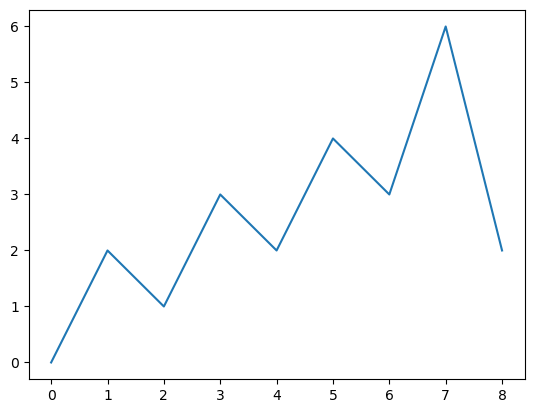

In [3]:
# Simple example

my_series = pd.Series([0, 2, 1, 3, 2, 4, 3, 6, 2])
fig = plt.figure()
my_axes = fig.add_subplot()

my_series.plot(ax=my_axes)
plt.show()

In [4]:
# More detailed example

# Random month incomes/expenses
income_expense_df = pd.DataFrame({
    "Income" : [randint(0, 1000) for x in range(30)],
    "Expenses" : [randint(0, 1000) for x in range(30)]
})

income_expense_df.head()

,Income,Expenses
0,542,142
1,62,889
2,521,765
3,528,627
4,302,893


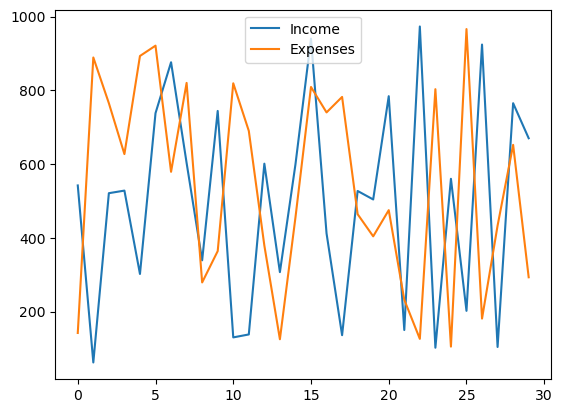

In [6]:
fig = plt.figure()
ie_ax = fig.add_subplot()

income_expense_df.plot(ax=ie_ax)
plt.show()

In [7]:
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.cumsum.html
income_expense_cs = income_expense_df.cumsum()
income_expense_cs.head()

,Income,Expenses
0,542,142
1,604,1031
2,1125,1796
3,1653,2423
4,1955,3316


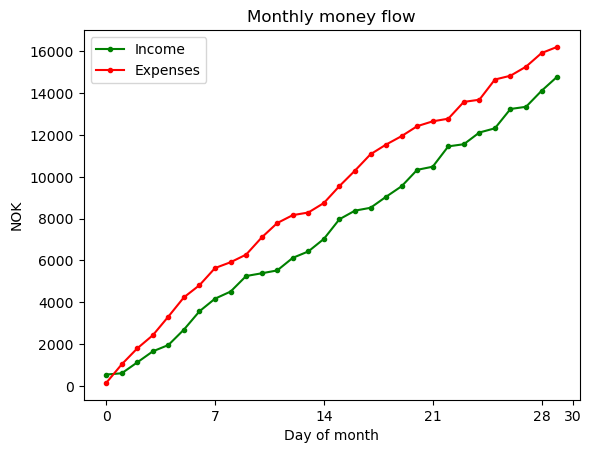

In [8]:
fig = plt.figure()
cs_ax = fig.add_subplot()

# Customize figure
cs_ax.set_title("Monthly money flow")
cs_ax.set_ylabel("NOK")
cs_ax.set_xlabel("Day of month")
cs_ax.set_xticks([0, 7, 14, 21, 28, 30])

#income_expense_cs.plot(ax=cs_ax)
income_expense_cs.plot(ax=cs_ax, color=["g","r"], marker=".")
plt.show()

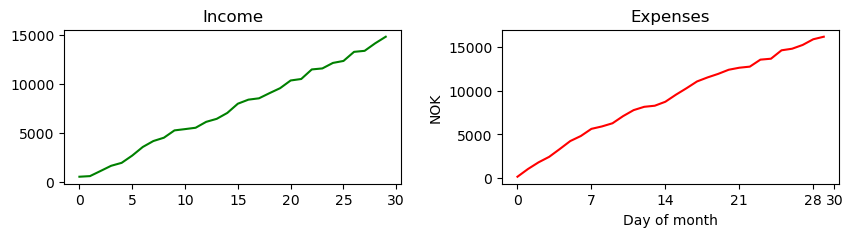

In [9]:
# Seperate into grid
fig = plt.figure(figsize=(10, 2))

income_axes = fig.add_subplot(1, 2, 1)
expense_axes = fig.add_subplot(1, 2, 2)

plt.subplots_adjust(wspace=0.3)
income_axes.set_title("Income")
expense_axes.set_title("Expenses")
for ax in [expense_axes, expense_axes]:
    ax.set_ylabel("NOK")
    ax.set_xlabel("Day of month")
    ax.set_xticks([0, 7, 14, 21, 28, 30])

income_expense_cs["Income"].plot(ax=income_axes, color="g")
income_expense_cs["Expenses"].plot(ax=expense_axes, color="r")
plt.show()

### Bar plots

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

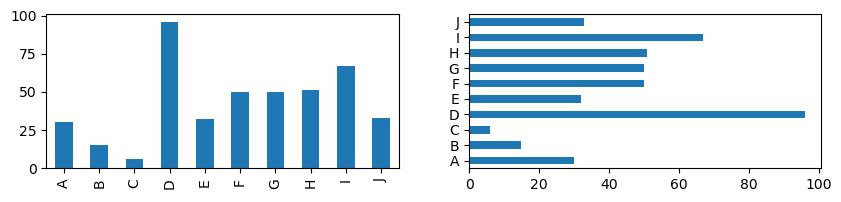

In [10]:
# Simple example

my_series = pd.Series([randint(0, 100) for x in range(10)], index=list("ABCDEFGHIJ") )

fig = plt.figure(figsize=(10, 2))
regular_bar_axes = fig.add_subplot(1, 2, 1)
horizontal_bar_axes = fig.add_subplot(1, 2, 2)

my_series.plot.bar(ax=regular_bar_axes)
my_series.plot.barh(ax=horizontal_bar_axes) # Horizontal bar
plt.show()

In [11]:
# More detailed example

# Random month incomes/expenses
income_expense_df = pd.DataFrame({
    "Income" : [randint(0, 1000) for x in range(30)],
    "Expenses" : [randint(0, 1000) for x in range(30)]
})

income_expense_df.head()

,Income,Expenses
0,200,729
1,96,333
2,15,810
3,391,994
4,866,405


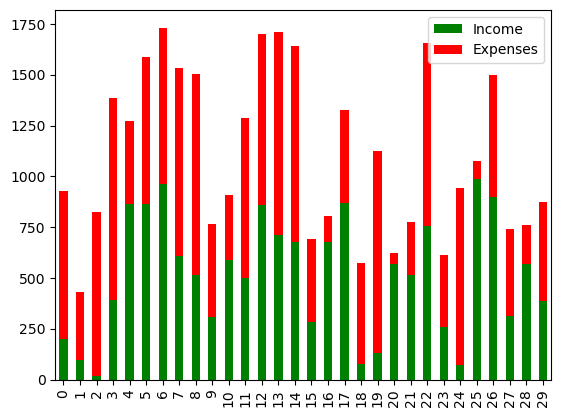

In [13]:
fig = plt.figure()
ie_ax = fig.add_subplot()

#income_expense_df.plot.bar(ax=ie_ax, color=["g", "r"])
income_expense_df.plot.bar(ax=ie_ax, color=["g", "r"], stacked=True)
plt.show()

In [14]:
# A little cleanup

# Group/sum by week
ie_by_week = income_expense_df[["Income", "Expenses"]].groupby(income_expense_df.index // 7).sum()
ie_by_week.index = [f"Week {idx + 1}" for idx in ie_by_week.index]
ie_by_week

,Income,Expenses
Week 1,3395,4764
Week 2,4102,5303
Week 3,3278,3509
Week 4,3804,3503
Week 5,958,675


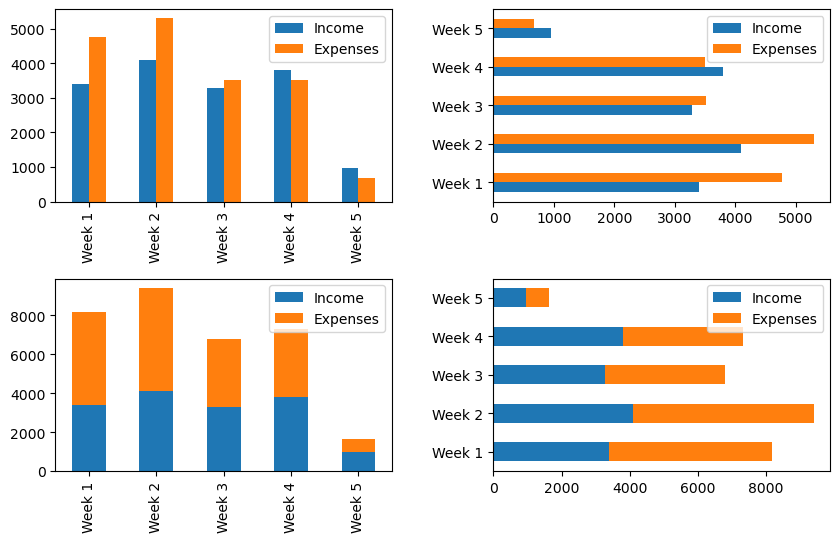

In [15]:
fig = plt.figure(figsize=(10, 6))
regular_bar_axes = fig.add_subplot(2, 2, 1)
horizontal_bar_axes = fig.add_subplot(2, 2, 2)
regular_bar_axes_stacked = fig.add_subplot(2, 2, 3)
horizontal_bar_axes_stacked = fig.add_subplot(2, 2, 4)

plt.subplots_adjust(wspace=.3, hspace=.4)

ie_by_week.plot.bar(ax=regular_bar_axes)
ie_by_week.plot.barh(ax=horizontal_bar_axes)
ie_by_week.plot.bar(ax=regular_bar_axes_stacked, stacked=True)
ie_by_week.plot.barh(ax=horizontal_bar_axes_stacked, stacked=True)
plt.show()

### Histogram plots

A representation of the distribution of data.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

In [24]:
income_expense_df.head()

,Income,Expenses
0,200,729
1,96,333
2,15,810
3,391,994
4,866,405


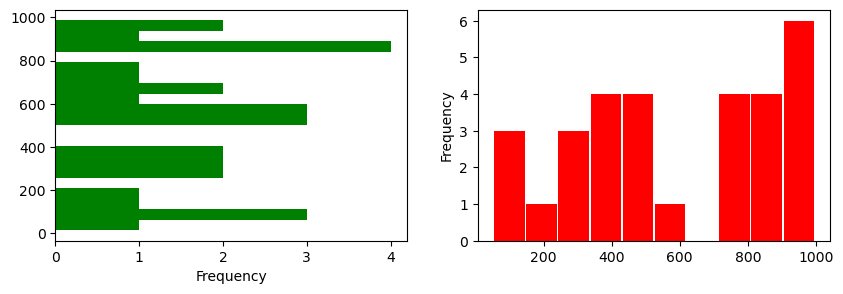

In [18]:
fig = plt.figure(figsize=(10, 3))
income_ax = fig.add_subplot(1, 2, 1)
expence_ax = fig.add_subplot(1, 2, 2)

#income_expense_df["Income"].plot.hist(ax=income_ax, color="g")
income_expense_df["Income"].plot.hist(ax=income_ax, color="g", bins=20, orientation="horizontal")
#income_expense_df["Expenses"].plot.hist(ax=expence_ax, color="r")
income_expense_df["Expenses"].plot.hist(ax=expence_ax, color="r", rwidth=.95)
plt.show()

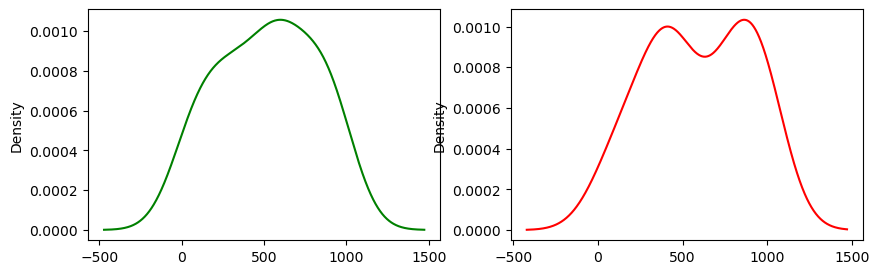

In [20]:
# Related plot type: density

fig = plt.figure(figsize=(10, 3))
income_ax = fig.add_subplot(1, 2, 1)
expence_ax = fig.add_subplot(1, 2, 2)

income_expense_df["Income"].plot.density(ax=income_ax, color="g")
income_expense_df["Expenses"].plot.density(ax=expence_ax, color="r")
plt.show()

### Scatter plots

A useful way of examining the relationship between two one dimensional data sets.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html

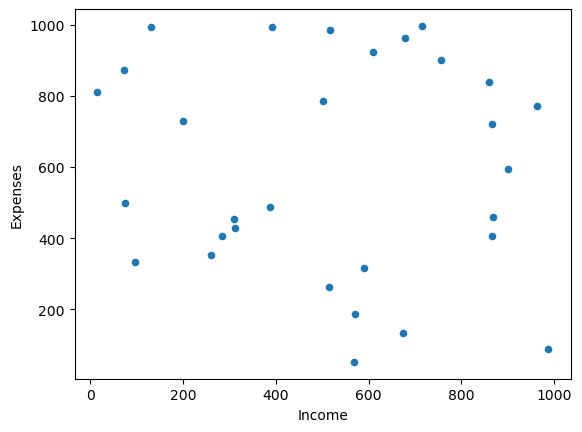

In [22]:
fig = plt.figure()
scatter_ax = fig.add_subplot()

income_expense_df.plot.scatter(ax=scatter_ax, x="Income", y="Expenses")

plt.show()
# We look at trend lines using seaborn in next lesson